In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
Startup = pd.read_csv(r'C:\Users\RAHUL CHAUHAN\Downloads\50_Startups.csv', encoding= 'unicode_escape')

In [3]:
Startup

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
#EDA

In [5]:
Startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
Startup.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
Startup1=Startup.rename({'R&D Spend':'RnD','Administration':'Admns','Marketing Spend':'Mkt_Spend'},axis=1)
Startup1.head()

,RnD,Admns,Mkt_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [8]:
Startup1.shape

(50, 5)

In [9]:
#check Duplicacy

In [10]:
Startup1[Startup1.duplicated()].shape

(0, 5)

In [11]:
Startup1[Startup1.duplicated()]

,RnD,Admns,Mkt_Spend,State,Profit


In [12]:
#No Duplicacy found

In [13]:
Startup1.describe()

,RnD,Admns,Mkt_Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [14]:
#Correlation Analysis

In [15]:
Startup1.corr()

,RnD,Admns,Mkt_Spend,Profit
RnD,1.000000,0.241955,0.724248,0.972900
Admns,0.241955,1.000000,-0.032154,0.200717
Mkt_Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


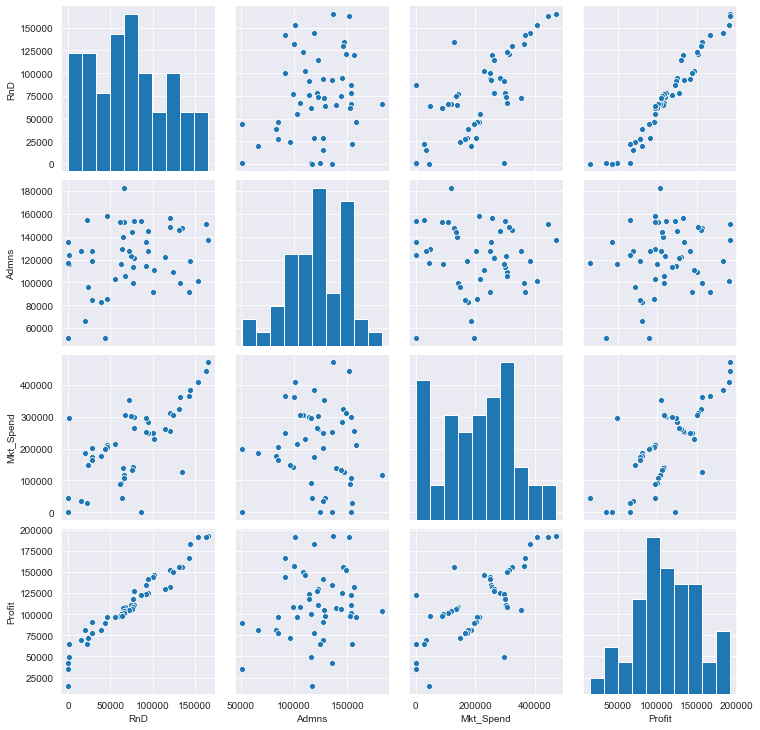

In [16]:
# Scatterplot between variables along with histograms
sns.set_style(style='darkgrid')
sns.pairplot(Startup1)

In [17]:
# Preparing a model
model = smf.ols('Profit~RnD+Admns+Mkt_Spend',data=Startup1).fit()

In [18]:
model.params

Intercept    50122.192990
RnD              0.805715
Admns           -0.026816
Mkt_Spend        0.027228
dtype: float64

In [19]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RnD          17.846374
Admns        -0.525507
Mkt_Spend     1.655077
dtype: float64 
 Intercept    1.057379e-09
RnD          2.634968e-22
Admns        6.017551e-01
Mkt_Spend    1.047168e-01
dtype: float64


In [20]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [21]:
# Simple Linear Regression Models

In [22]:
ml_r=smf.ols('Profit~RnD',data=Startup1).fit()
print(ml_r.tvalues, '\n', ml_r.pvalues)

Intercept    19.320288
RnD          29.151139
dtype: float64 
 Intercept    2.782697e-24
RnD          3.500322e-32
dtype: float64


In [23]:
ml_a=smf.ols('Profit~Admns',data=Startup1).fit()
print(ml_a.tvalues, '\n', ml_a.pvalues)

Intercept    3.040044
Admns        1.419493
dtype: float64 
 Intercept    0.003824
Admns        0.162217
dtype: float64


In [24]:
ml_m=smf.ols('Profit~Mkt_Spend',data=Startup1).fit()
print(ml_m.tvalues, '\n', ml_m.pvalues)

Intercept    7.808356
Mkt_Spend    7.802657
dtype: float64 
 Intercept    4.294735e-10
Mkt_Spend    4.381073e-10
dtype: float64


In [25]:
ml_am=smf.ols('Profit~Admns+Mkt_Spend',data=Startup1).fit()
print(ml_am.tvalues, '\n', ml_am.pvalues)

Intercept    1.142741
Admns        2.467779
Mkt_Spend    8.281039
dtype: float64 
 Intercept    2.589341e-01
Admns        1.729198e-02
Mkt_Spend    9.727245e-11
dtype: float64


In [26]:
# variables having significant pvalues

In [27]:
#Calculating VIF

In [28]:
rsq_Rnd=smf.ols('RnD~Admns+Mkt_Spend',data=Startup1).fit().rsquared
vif_Rnd=1/(1-rsq_Rnd)

rsq_admn=smf.ols('Admns~RnD+Mkt_Spend',data=Startup1).fit().rsquared
vif_admn=1/(1-rsq_admn)

rsq_Mkt=smf.ols('Mkt_Spend~Admns+RnD',data=Startup1).fit().rsquared
vif_Mkt=1/(1-rsq_Mkt)

# Storing vif values in a data frame
d1 = {'Variables':['RnD','Admns','Mkt_Spend'],'VIF':[vif_Rnd,vif_admn,vif_Mkt]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RnD,2.468903
1,Admns,1.175091
2,Mkt_Spend,2.326773


In [29]:
#No variables having VIF>20, No collinearity found, Thus, we can consider all variables.

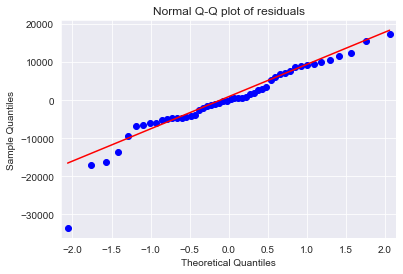

In [30]:
# Residual Analysis
## Test for Normality of Residuals (Q-Q Plot)
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [31]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [32]:
## Residual Plot for Homoscedasticity

In [33]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

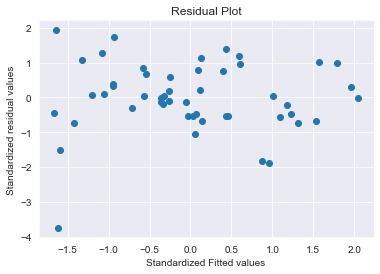

In [34]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [35]:
## Residual Vs Regressors

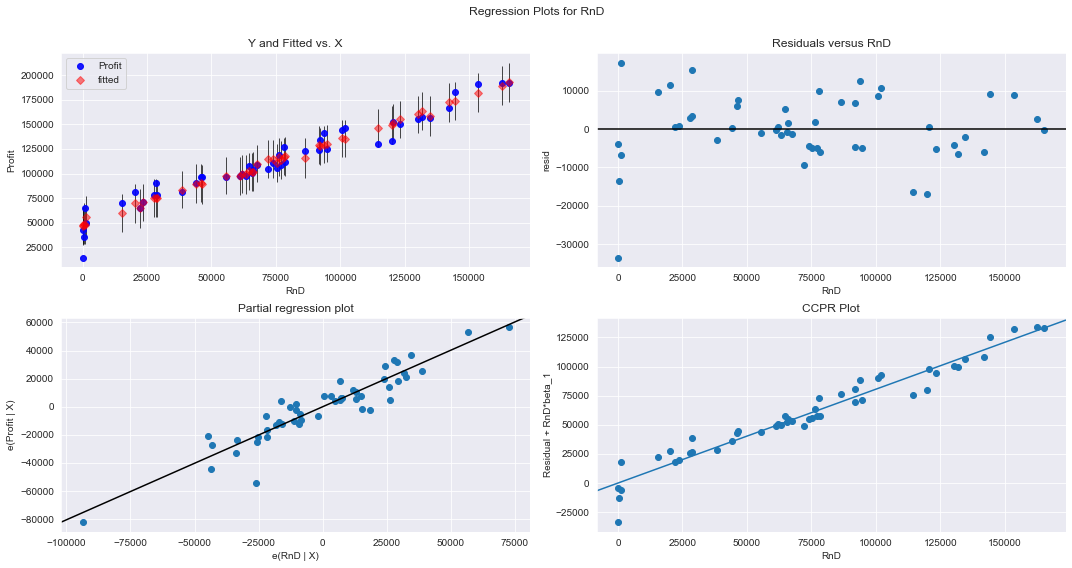

In [36]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RnD", fig=fig)
plt.show()

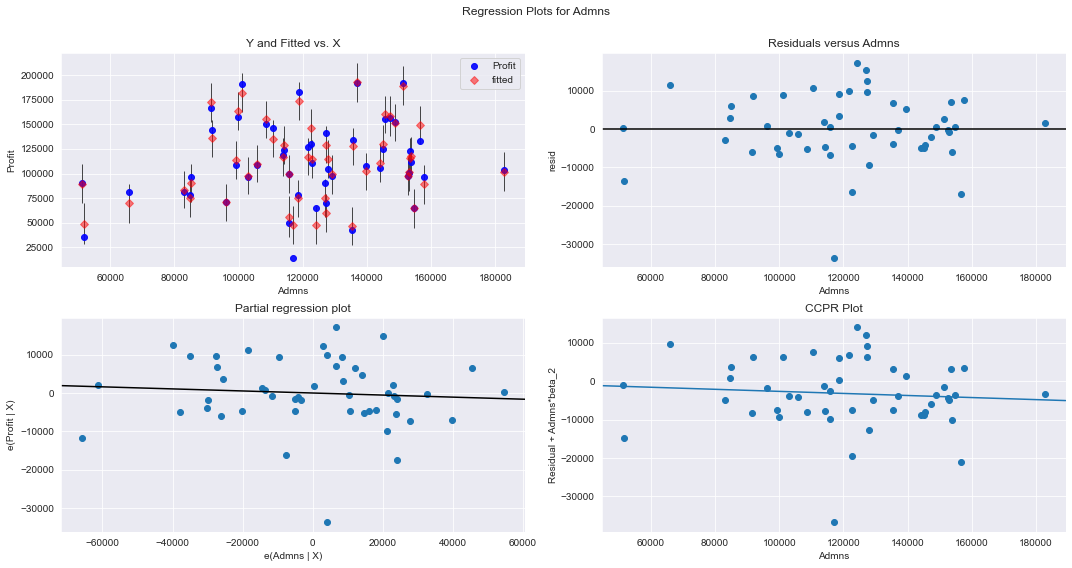

In [37]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Admns", fig=fig)
plt.show()

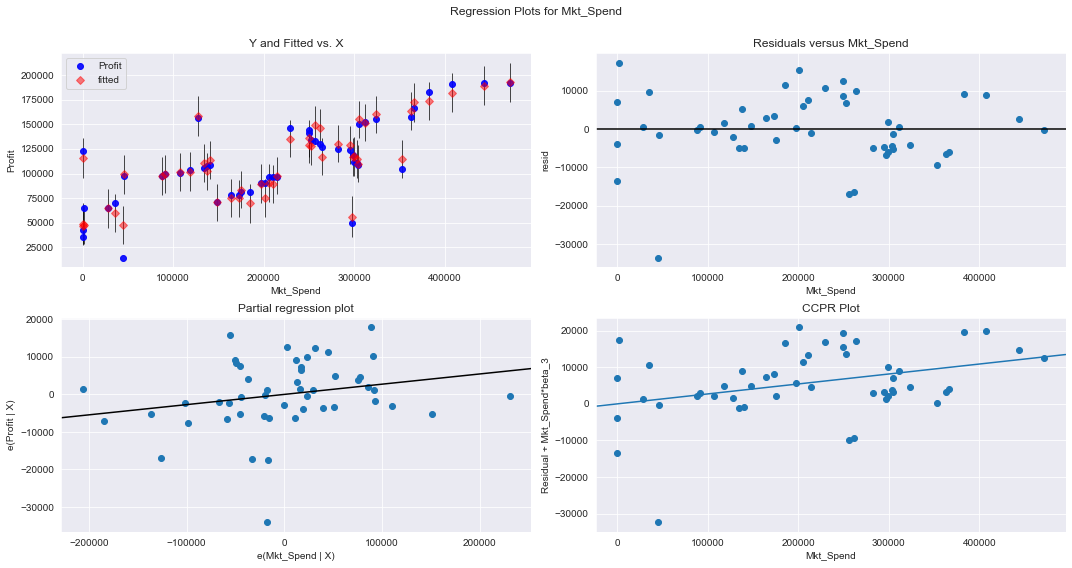

In [38]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Mkt_Spend", fig=fig)
plt.show()

In [39]:
# Model Deletion Diagnostics
## Detecting Influencers/Outliers
## Cook’s Distance

In [40]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

<ipython-input-41-7518498d8bde>:3: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(Startup1)), np.round(c, 3))


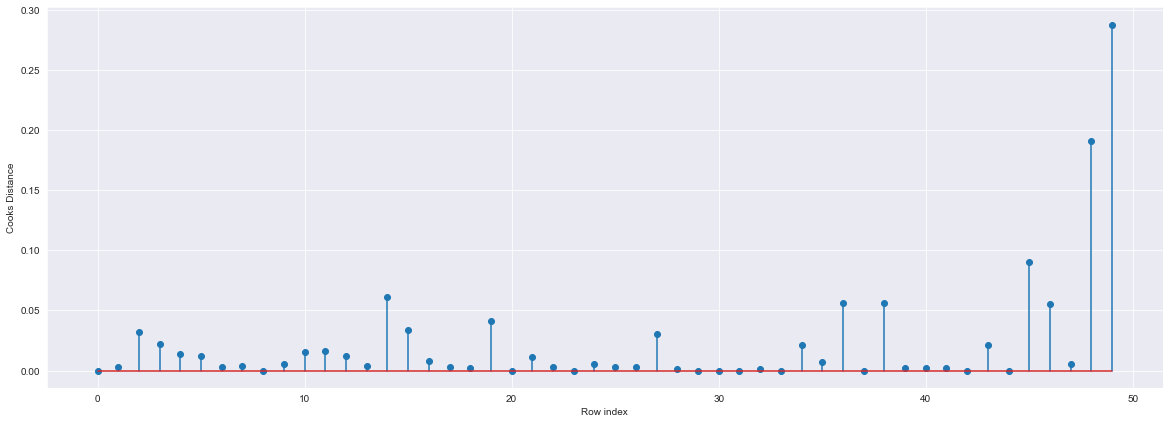

In [41]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(Startup1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [42]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.28808229275432634)

In [43]:
## High Influence points

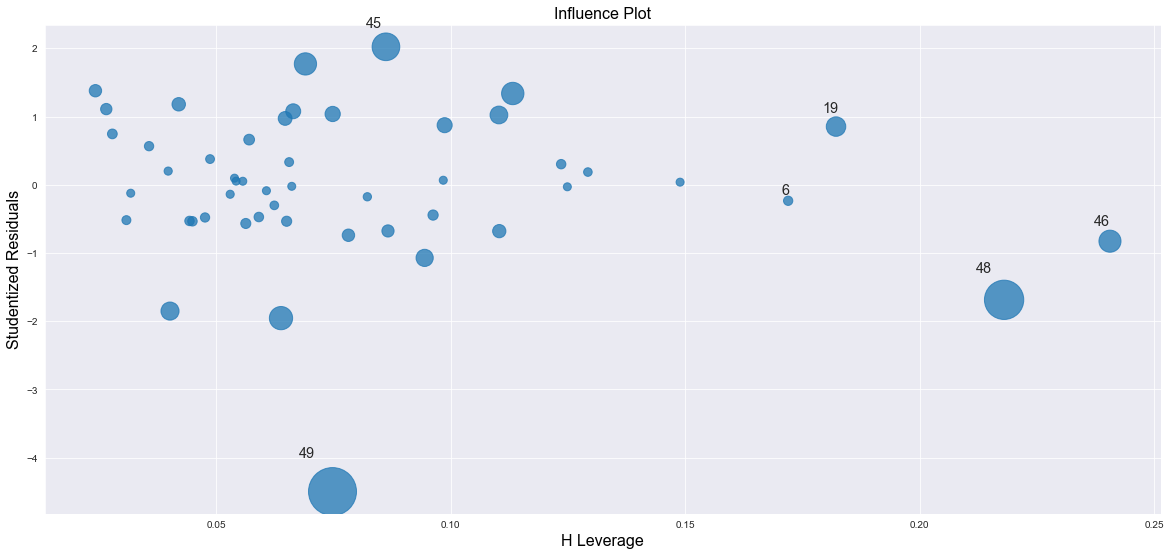

In [44]:
from statsmodels.graphics.regressionplots import influence_plot
fig, ax = plt.subplots(figsize=(20,9))
fig = sm.graphics.influence_plot(model, ax=ax, criterion="cooks")

In [45]:
k = Startup1.shape[1]
n = Startup1.shape[0]
leverage_cutoff = 3*((k + 1)/n)

In [46]:
Startup1[Startup1.index.isin([49])]

,RnD,Admns,Mkt_Spend,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [47]:
#improving the model

In [48]:
Startup2=Startup1.copy()
Startup2

,RnD,Admns,Mkt_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [49]:
Startup3=Startup2.drop(Startup2.index[49],axis=0).reset_index(drop=True)

In [50]:
Startup3

,RnD,Admns,Mkt_Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [51]:
#Build Model

In [52]:
final_ml= smf.ols('Profit~RnD+Admns+Mkt_Spend',data = Startup3).fit()

In [53]:
(final_ml.rsquared,final_ml.aic)

(0.9613162435129847, 1020.5652974526367)

In [54]:
#model accuracy improved to 0.9613162435129847

In [55]:
## Predicting for new data

In [56]:
#New data for prediction
new_data=pd.DataFrame({'RnD':32000,"Admns":48500,"Mkt_Spend":57000},index=[1])

In [57]:
new_data

,RnD,Admns,Mkt_Spend
1,32000,48500,57000


In [58]:
#price_prediction
final_ml.predict(new_data)

1    77800.049487
dtype: float64

In [59]:
pred_y=final_ml.predict(Startup3)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

In [60]:
#table having R^2 value for each prepared model

In [61]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_ml.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
